### Library Imports

In [3]:
import os
import subprocess

from moviepy.editor import VideoFileClip
import matplotlib.pyplot as plt
import numpy as np

### Dataset Paths

In [2]:
rawVideosPath = os.path.join("E:", "CMU-MOSI", "Raw")                              # Raw videos path
raw_onlyVideo_path = os.path.join("E:", "CMU-MOSI", "Splited", "parsedVideo")      # Videos parsed and edited
raw_onlyAudio_path = os.path.join("E:", "CMU-MOSI", "Splited", "Raw_onlyAudio")    # Only audio files of the raw videos

In [4]:
# List to store all video durations and paths for histogram and calculations
all_durations = []
all_paths = []

for folder in os.listdir(rawVideosPath):
    if os.path.isdir(os.path.join(rawVideosPath, folder)):
        currentFolderPath = os.path.join(rawVideosPath, folder)
        currentFolderName = folder
        
        # Process each video in the folder
        for video in os.listdir(currentFolderPath):
            video_path = os.path.join(currentFolderPath, video)
            if video.endswith('.mp4') and os.path.isfile(video_path):
                # Get video duration
                try:
                    with VideoFileClip(video_path) as clip:
                        duration = clip.duration  # Duration in seconds
                        all_durations.append(duration)  # Add duration to list
                        all_paths.append(video_path)  # Keep track of video path
                except Exception as e:
                    print(f"Error processing {video_path}: {e}")
                    continue

# Calculate global longest and shortest durations and their paths
if all_durations:
    global_longest_duration = np.max(all_durations)
    global_shortest_duration = np.min(all_durations)
    global_longest_video_path = all_paths[np.argmax(all_durations)]
    global_shortest_video_path = all_paths[np.argmin(all_durations)]

    # Print global results
    print("Global Results:")
    print(f"  Longest Video Duration: {global_longest_duration:.2f} seconds")
    print(f"  Longest Video Path: {global_longest_video_path}")
    print(f"  Shortest Video Duration: {global_shortest_duration:.2f} seconds")
    print(f"  Shortest Video Path: {global_shortest_video_path}")

    # Calculate and print the mean duration
    mean_duration = np.mean(all_durations)
    print(f"  Mean Video Duration: {mean_duration:.2f} seconds")
else:
    print("No video durations were processed.")

Global Results:
  Longest Video Duration: 52.50 seconds
  Longest Video Path: E:CMU-MOSI\Raw\2WGyTLYerpo\44.mp4
  Shortest Video Duration: 0.26 seconds
  Shortest Video Path: E:CMU-MOSI\Raw\9qR7uwkblbs\33.mp4
  Mean Video Duration: 4.30 seconds


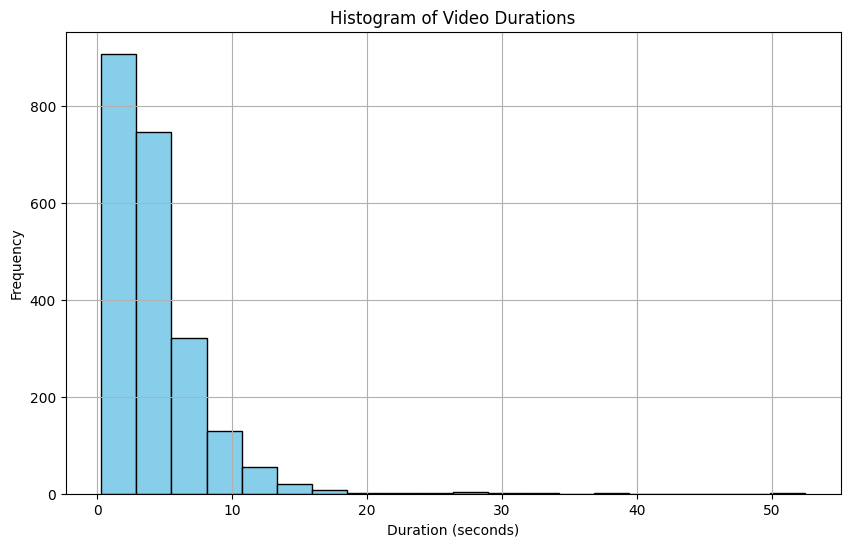

In [5]:
# Plot histogram of video durations
if all_durations:
    plt.figure(figsize=(10, 6))
    plt.hist(all_durations, bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram of Video Durations')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [6]:
# Convert lists to numpy arrays for easy filtering
durations_array = np.array(all_durations)
paths_array = np.array(all_paths)

In [21]:
# Specify the duration threshold in seconds
duration_threshold = 10

In [22]:
# Get indices where durations exceed the threshold
above_threshold_indices = np.where(durations_array > duration_threshold)[0]

# Print videos with durations above the threshold
print(f"\nVideos with durations above {duration_threshold} seconds are a total of {np.sum(durations_array > duration_threshold)}:")
for idx in above_threshold_indices:
    print(f"  - {paths_array[idx]} ({durations_array[idx]:.2f} seconds)")


Videos with durations above 10 seconds are a total of 119:
  - E:CMU-MOSI\Raw\03bSnISJMiM\2.mp4 (10.40 seconds)
  - E:CMU-MOSI\Raw\03bSnISJMiM\8.mp4 (11.23 seconds)
  - E:CMU-MOSI\Raw\0h-zjBukYpk\2.mp4 (12.30 seconds)
  - E:CMU-MOSI\Raw\0h-zjBukYpk\25.mp4 (12.10 seconds)
  - E:CMU-MOSI\Raw\1iG0909rllw\21.mp4 (12.23 seconds)
  - E:CMU-MOSI\Raw\2iD-tVS8NPw\20.mp4 (14.01 seconds)
  - E:CMU-MOSI\Raw\2iD-tVS8NPw\21.mp4 (10.40 seconds)
  - E:CMU-MOSI\Raw\2iD-tVS8NPw\26.mp4 (11.07 seconds)
  - E:CMU-MOSI\Raw\2iD-tVS8NPw\27.mp4 (12.12 seconds)
  - E:CMU-MOSI\Raw\2WGyTLYerpo\24.mp4 (10.97 seconds)
  - E:CMU-MOSI\Raw\2WGyTLYerpo\44.mp4 (52.50 seconds)
  - E:CMU-MOSI\Raw\6Egk_28TtTM\11.mp4 (12.00 seconds)
  - E:CMU-MOSI\Raw\6Egk_28TtTM\3.mp4 (10.63 seconds)
  - E:CMU-MOSI\Raw\73jzhE8R1TQ\13.mp4 (11.03 seconds)
  - E:CMU-MOSI\Raw\7JsX8y1ysxY\5.mp4 (15.30 seconds)
  - E:CMU-MOSI\Raw\7JsX8y1ysxY\8.mp4 (13.55 seconds)
  - E:CMU-MOSI\Raw\8d-gEyoeBzc\21.mp4 (18.50 seconds)
  - E:CMU-MOSI\Raw\8d-gEyoeB

---

## Functions

In order to use the `Audio Models` (and further the `Text Models`) we need to obtain the sound of each video in the dataset.

### Function to extract ONLY THE `AUDIO` from a raw video file


Converts video to audio directly using `ffmpeg` command with the help of subprocess module
using the subprocess module
- `-y` flag is used to overwrite the file if it already exists
- `-i` flag is used to specify the input file

SOURCE: https://thepythoncode.com/article/extract-audio-from-video-in-python?utm_content=cmp-true

In [ ]:
# Converts video to audio directly using `ffmpeg` command with the help of subprocess module
# using the subprocess module (-y flag is used to overwrite the file if it already exists) (-i flag is used to specify the input file)
# INPUT:
#   rawVideo_InputFullPath: The full path of the raw video file (eg. "D:\Dataset\Raw\ixYzDdasdaDA\1.mp4")
#   onlyAudio_OutputFullPath: The full path of the output audio file (eg. "D:\Dataset\Splited\Raw_onlyAudio\ixYzDdasdaDA")
#   extension: The extension of the output audio file (default is "wav")
def extractAudioFromRawVideo(rawVideo_InputFullPath, onlyAudio_OutputFullPath, extension="wav"):
    try:
        # Define the output audio file path
        video_filename = os.path.basename(rawVideo_InputFullPath)                   # eg. "1.mp4"
        audio_filename = os.path.splitext(video_filename)[0] + "." + extension      # eg. "1.wav"
        output_path = os.path.join(onlyAudio_OutputFullPath, audio_filename)        # eg. "D:\Dataset\Splited\Raw_onlyAudio\ixYzDdasdaDA\1.wav"

        if not os.path.exists(onlyAudio_OutputFullPath):
            # Create the directory
            os.makedirs(onlyAudio_OutputFullPath)

        subprocess.call(["ffmpeg", "-y", "-i", rawVideo_InputFullPath, output_path],
                        stdout=subprocess.DEVNULL,
                        stderr=subprocess.STDOUT)

        print(f"Audio has been extracted and saved to {output_path}")
    except FileNotFoundError:
        print(f"The file {rawVideo_InputFullPath} does not exist.")
    except PermissionError:
        print(f"Permission denied to access {rawVideo_InputFullPath} or {onlyAudio_OutputFullPath}.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [ ]:
""" CODE TESTING BLOCK """

# rawVideo_InputFullPath = os.path.join("C:", "Users", "paris", "Desktop", "0.mp4")
# onlyAudio_OutputFullPath = os.path.join("C:", "Users", "paris", "Desktop")
# extractAudioFromRawVideo(rawVideo_InputFullPath, onlyAudio_OutputFullPath)

---

## Scripts to extract audio & parse video files from raw files in the dataset

#### Audio

`CMU-MOSEI` dataset has been saved in the following structure:
`D:\Dataset\Raw\{videoId}\{clipId}.mp4` , where
- `videoId` is a unique YouTube Video and
- it is splited into parts, each part is a `clipId` (Not unique name, but `{videoId}\{clipId}.mp4` is unique).


This is a script to iterate over all the folders in a specific path and keep in variables the
folder path, folder name, video path and video name for each video in each folder.

(Keeping the names in variables to use `labels.csv` in the future...)

- Extracts the audio from the video and saves it in a new folder (keeps the same folder structure).
- Saves the video without audio in a new folder (keeps the same folder structure).

In [ ]:
for folder in os.listdir(rawVideosPath):
    if os.path.isdir(os.path.join(rawVideosPath, folder)):
        currentFolderPath = os.path.join(rawVideosPath, folder)     # The full current folder path (ex. D:\Dataset\Raw\ixYzDdasdaDA)
        currentFolderName = folder                                  # The current folder name (ex. ixYzDdasdaDA)
        for video in os.listdir(currentFolderPath):
            if video.endswith('.mp4') and os.path.isfile(os.path.join(currentFolderPath, video)):
                currentVideoPath = os.path.join(currentFolderPath, video)   # The full current video path (ex. D:\Dataset\Raw\ixYzDdasdaDA\1.mp4)
                currentVideoName = video                                    # The current video name (ex. 1.mp4)

                extractAudioFromRawVideo(currentVideoPath, os.path.join(raw_onlyAudio_path, currentFolderName))

Audio has been extracted and saved to E:CMU-MOSI\Splited\Raw_onlyAudio\03bSnISJMiM\1.wav
Audio has been extracted and saved to E:CMU-MOSI\Splited\Raw_onlyAudio\03bSnISJMiM\10.wav
Audio has been extracted and saved to E:CMU-MOSI\Splited\Raw_onlyAudio\03bSnISJMiM\11.wav
Audio has been extracted and saved to E:CMU-MOSI\Splited\Raw_onlyAudio\03bSnISJMiM\12.wav
Audio has been extracted and saved to E:CMU-MOSI\Splited\Raw_onlyAudio\03bSnISJMiM\13.wav
Audio has been extracted and saved to E:CMU-MOSI\Splited\Raw_onlyAudio\03bSnISJMiM\2.wav
Audio has been extracted and saved to E:CMU-MOSI\Splited\Raw_onlyAudio\03bSnISJMiM\3.wav
Audio has been extracted and saved to E:CMU-MOSI\Splited\Raw_onlyAudio\03bSnISJMiM\4.wav
Audio has been extracted and saved to E:CMU-MOSI\Splited\Raw_onlyAudio\03bSnISJMiM\5.wav
Audio has been extracted and saved to E:CMU-MOSI\Splited\Raw_onlyAudio\03bSnISJMiM\6.wav
Audio has been extracted and saved to E:CMU-MOSI\Splited\Raw_onlyAudio\03bSnISJMiM\7.wav
Audio has been ex


#### Helper Function - Compare directories to make sure all video files were processed and exported to `.mp3`

Used to make sure the function `extractAudioFromRawVideo()` was able to process all video files in the dataset.

In [ ]:
# This function returns the set of files and directories in the given root directory
# INPUT:
#   root: The root directory to search for files and directories
# OUTPUT:
#   files: A set of files in the given root directory
#   dirs: A set of directories in the given root directory
def get_files_and_dirs(root):
    files = set()
    dirs = set()
    # Walk through the root directory and get the files and directories
    for dirpath, dirnames, filenames in os.walk(root):
        # For each file and directory, add the relative path to the root directory to the set
        for dirname in dirnames:
            dirs.add(os.path.relpath(os.path.join(dirpath, dirname), root))
        # For each file and directory, add the relative file name to the set
        for filename in filenames:
            files.add(os.path.relpath(os.path.join(dirpath, os.path.splitext(filename)[0]), root))
    return files, dirs

# This function compares two directories and prints the differences
# Only compares the names of the files and directories (not the file extensions)
# eg. the directory "D:\Dataset\Raw\ might have a subdirectory "ixYzDdasdaDA\1.mp4"
# and the directory "D:\Dataset\Splited\Raw_onlyAudio" might have a subdirectory "ixYzDdasdaDA\1.mp3"
# so the function will print that the directories are the OK (although the files have different extensions)
# INPUT:
#   dir1: The first directory to compare
#   dir2: The second directory to compare
def compare_directories(dir1, dir2):
    files1, dirs1 = get_files_and_dirs(dir1)    # Get the files and directories in the first directory
    files2, dirs2 = get_files_and_dirs(dir2)    # Get the files and directories in the second directory

    diff_files1 = files1 - files2   # Get the files that are only in the first directory
    diff_files2 = files2 - files1   # Get the files that are only in the second directory
    diff_dirs1 = dirs1 - dirs2      # Get the directories that are only in the first directory
    diff_dirs2 = dirs2 - dirs1      # Get the directories that are only in the second directory

    # Print the differences in the files and directories
    # Files
    if diff_files1 or diff_files2:
        print(f"Different files:\nOnly in {dir1}:\n{diff_files1}\nOnly in {dir2}:\n{diff_files2}")
    else:
        print("Both directories have the same files (comparing by name only).")
    # Directories
    if diff_dirs1 or diff_dirs2:
        print(f"Different directories:\nOnly in {dir1}:\n{diff_dirs1}\nOnly in {dir2}:\n{diff_dirs2}")
    else:
        print("Both directories have the same subdirectories.")

In [ ]:
compare_directories(rawVideosPath, raw_onlyAudio_path)

Both directories have the same files (comparing by name only).
Both directories have the same subdirectories.


OK. (22856 videos)